In [1]:
__file__ = 'A1.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP4_lib")
import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from uncertainties import unumpy as up
from uncertainties import ufloat
import scipy.constants as const

In [2]:
with open('Data/Aufgabe_4.3.txt','r') as tf:
    data = np.genfromtxt(tf).T
with open('Res/cp-cal_res.txt','r') as tf:
    cal = np.genfromtxt(tf).T

data = f.channel_to_pos(data,cal)

von 4.08  
bis 4.32

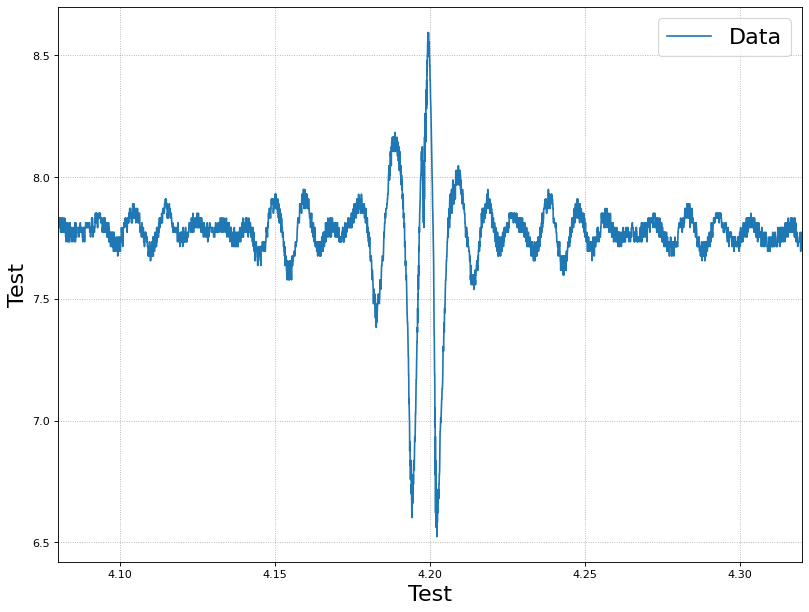

In [3]:
f.figsize(1)
plt.errorbar(data[0],data[1],label = 'Data')
f.form([4.08,4.32])

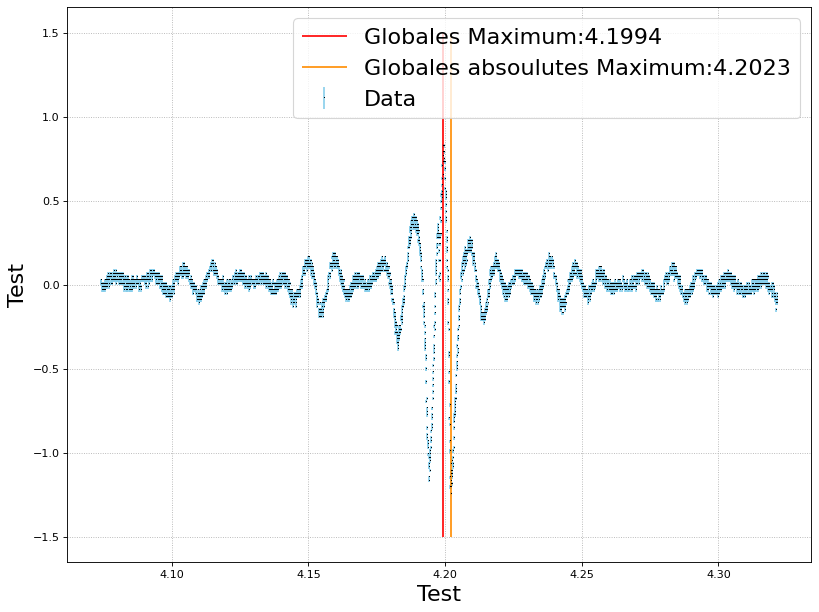

In [55]:
intensity = data[1]
position  = data[0]#*freq_scale

f.figsize(1)

intensity -= np.mean(intensity)

plt.errorbar(position,intensity,yerr = np.full(len(position),0.01),fmt=',k',label = 'Data',ecolor = 'skyblue')
absmax = np.argmax(np.abs(intensity))
max    = np.argmax(intensity)

plt.vlines(position[max],-1.5,1.5,colors="red",label=f'Globales Maximum:{round(position[max],4)}')
plt.vlines(position[absmax],-1.5,1.5,colors="darkorange",label=f'Globales absoulutes Maximum:{round(position[absmax],4)}')
f.form()